# Homework #5

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio
import pickle as pkl

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,6)


Text(0.5, 0, 'Observed data, $P(d|s)$')

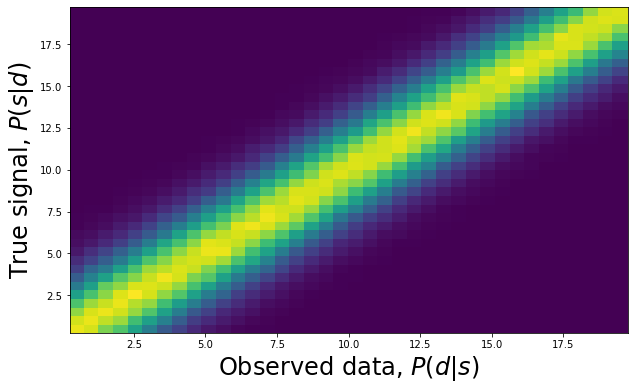

In [3]:
x = np.linspace(-20,20,40)
bkgd = stats.norm.rvs(loc=0,scale=2, size = 1000000)
signal = stats.uniform.rvs(loc=0,scale=20, size = 1000000)
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(0,20,40)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

In [4]:
table = pd.DataFrame(columns = ['Background', 'Signal', 'Data'])
table['Data'] = data
table['Signal'] = signal
table['Background'] = bkgd
table 

,Background,Signal,Data
0,0.986671,10.267876,11.254548
1,-0.221720,18.831132,18.609412
2,-0.197297,17.982787,17.785490
3,2.643175,18.942768,21.585943
4,2.127979,18.570878,20.698857
...,...,...,...
999995,-3.025772,2.835651,-0.190121
999996,-0.868978,6.784875,5.915897
999997,-1.609409,1.480538,-0.128872
999998,0.320760,1.671862,1.992621


Here I will select only the data that has a true signal of 16 (rane from 15.8 to 16.2) and plot the data that includes the background in order to see the distribution of data due to background. This plot show the spread of values that will be recorded when given a 16 +- .2 true signal. 

Text(0.5, 1.0, 'True Signal of 13, Observed Signal Spread')

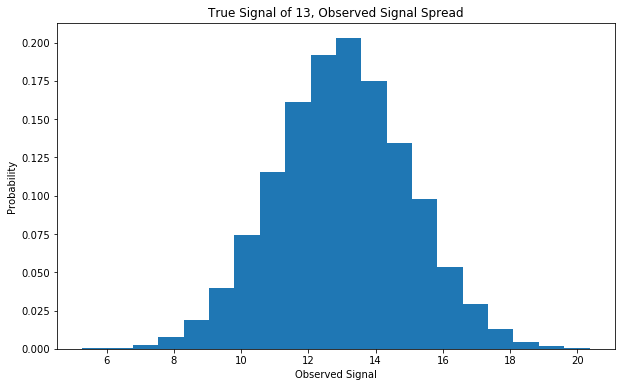

In [5]:
signal13 = table.query(f'12.8 < Signal < 13.2')
plt.hist(signal13['Data'], bins =20, density = True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.title('True Signal of 13, Observed Signal Spread')

The above plot is a representation of a horizontal slice of the 2D histogram plotted above with 16 being the value of the true signal. This plot describes the distribution of the collected data (including background noise) for a real signal value of 16. 

$P(signal|data)=\frac{P(data|signal)P(signal)}{P(data)}$

With P(data) being a normalization factor, and the fact that the background distribution is normal, that means $P(signal|data)\propto P(data|signal)$ and therefore when normalized they provide the same histogram. 

Text(0.5, 1.0, 'Observed Signal of 13, True Signal Possibility Spread')

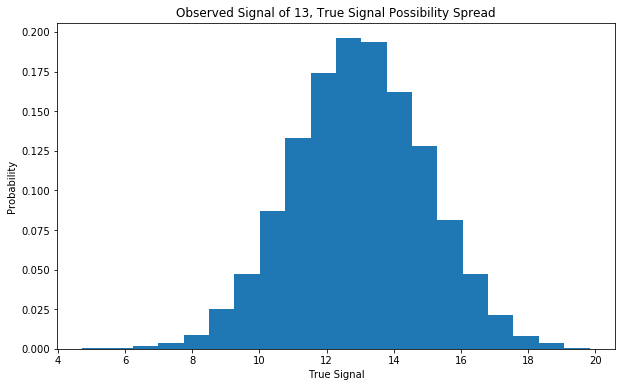

In [6]:
observed13 = table.query(f'12.8 < Data < 13.2')
plt.hist(observed13['Signal'], bins =20, density = True)
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 13, True Signal Possibility Spread')

This graph represents the possible values of true signals if the detector were to provide a reading of 13. This would be equivalent to a vertical strip of the above 2D histogram that is surrounding 13 on the x axis.

## Problem 2) 

Here I will create the same plots as I have above, but now the background will not be centered at 0, it will be centered at 6, still with sigma of 2. This will make it so that the true and observed signal values are not centered on the same value. Here we will see that the plots of $P(signal|data)$ and $ P(data|signal)$ will only overlap in a very small area. 

Text(0.5, 0, 'Observed data, $P(d|s)$')

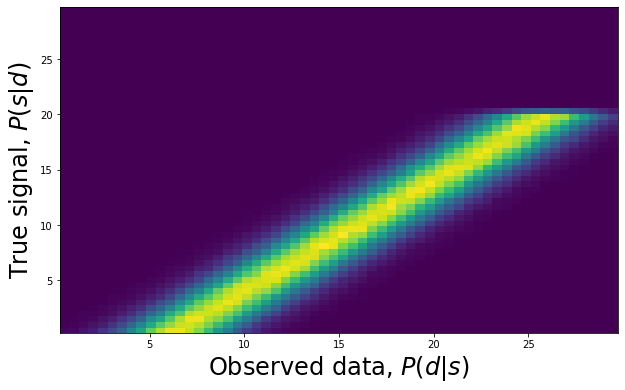

In [7]:
x = np.linspace(-20,20,40)
bkgd = stats.norm.rvs(loc=6,scale=2, size = 1000000)
signal = stats.uniform.rvs(loc=0,scale=20, size = 1000000)
data = bkgd + signal

signaledges = np.linspace(0,30,60)
dataedges = np.linspace(0,30,60)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

In [8]:
table = pd.DataFrame(columns = ['Background', 'Signal', 'Data'])
table['Data'] = data
table['Signal'] = signal
table['Background'] = bkgd
table 

,Background,Signal,Data
0,3.891842,0.542145,4.433987
1,8.152601,2.875203,11.027805
2,7.598073,8.289405,15.887478
3,6.927626,15.630323,22.557949
4,8.505277,0.257741,8.763019
...,...,...,...
999995,5.834049,2.695239,8.529288
999996,7.915725,11.091331,19.007057
999997,2.697111,9.144853,11.841964
999998,5.226532,4.318570,9.545102


Text(0.5, 1.0, 'True Signal of 13, Observed Signal Spread')

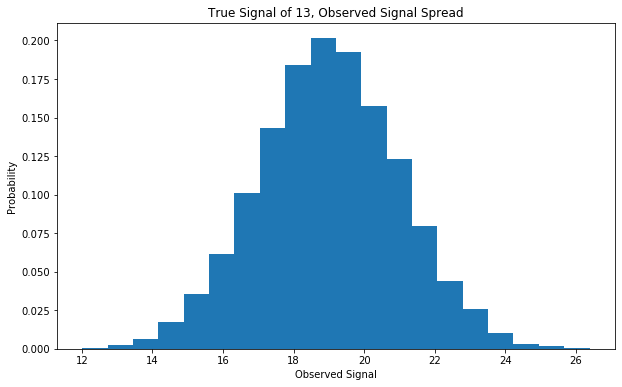

In [9]:
signal13 = table.query(f'12.8 < Signal < 13.2')
plt.hist(signal13['Data'], bins =20, density = True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.title('True Signal of 13, Observed Signal Spread')

This means that any True Value signal of 13 will correspond to an observed signal centered at 19 with a sigma=2 spread. 

Text(0.5, 1.0, 'Observed Signal of 13, True Signal Possibility Spread')

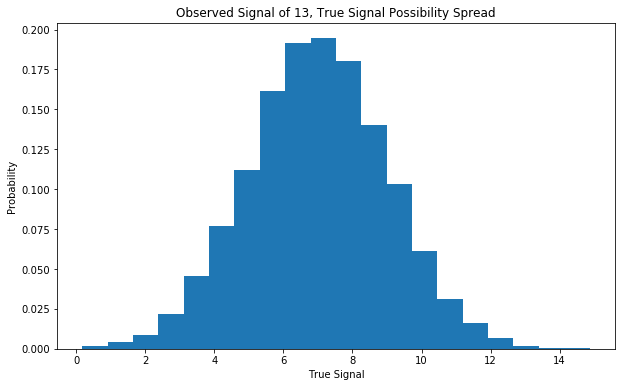

In [10]:
observed13 = table.query(f'12.8 < Data < 13.2')
plt.hist(observed13['Signal'], bins =20, density = True)
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 13, True Signal Possibility Spread')

Similarly, this plot means that if the observed value of a signal is 13, it was made from a true signal of any of the above posibilities. Most likely a true value of 7 with a sigma=2 spread. 

Text(0, 0.5, 'Probability')

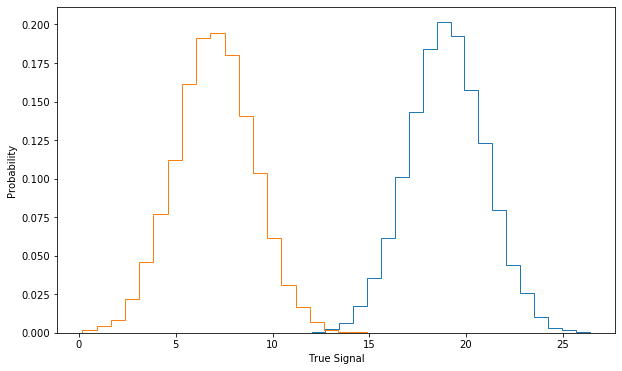

In [11]:
plt.hist(signal13['Data'], bins =20, density = True, histtype='step')
plt.hist(observed13['Signal'], bins =20, density = True, histtype='step')
plt.xlabel('True Signal')
plt.ylabel('Probability')
#plt.title('Observed Signal of 13, True Signal Possibility Spread')

These are not centered at the same location because the background distribution does not have an average of zero. They are both offset from 13 by the average of the background (6) in either direction. You add the 6ish to the true signal to get the spread of the observed signal, and you subtract the 6ish from the observed signal to get the spread of the possible true signals. 